<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/drive-download-20250414T061518Z-001/banknotes'
img_width, img_height = 128,128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape = (img_width, img_height, 3)),MaxPooling2D((2,2)),Conv2D(64, (3,3), activation='relu'),MaxPooling2D((2,2)),Conv2D(128, (3,3), activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(256, activation='relu'),Dense(128, activation='relu'),Dense(4, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50)
model.save('vietnamdong.keras')

Found 121 images belonging to 4 classes.
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2196 - loss: 1.4896
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2794 - loss: 1.3843
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 964ms/step - accuracy: 0.2402 - loss: 1.3844
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 903ms/step - accuracy: 0.3840 - loss: 1.3735
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5061 - loss: 1.3449
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5081 - loss: 1.3129
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 999ms/step - accuracy: 0.3928 - loss: 1.2825
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3885 - loss: 1.2263
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 961ms/step - accuracy: 0.4366 - loss: 1.1507
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 908ms/step - accuracy: 0.6266 - loss: 1.0528
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5597 - loss: 1.0780
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - a

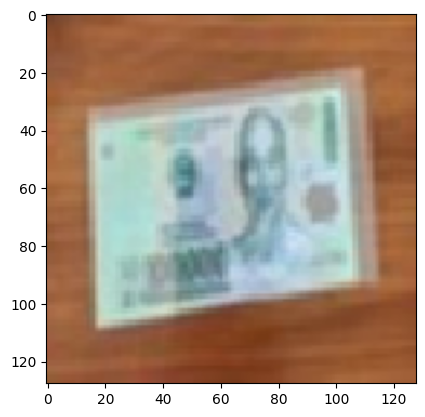

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
{'gia_tien:500k'}


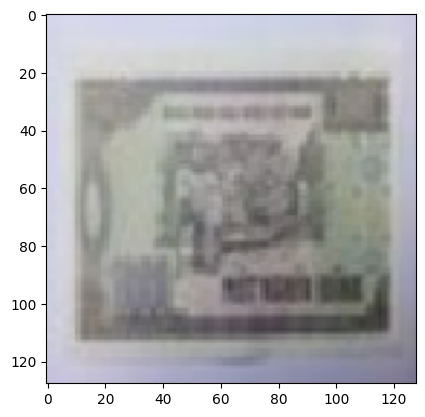

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
{'gia_tien:2k'}


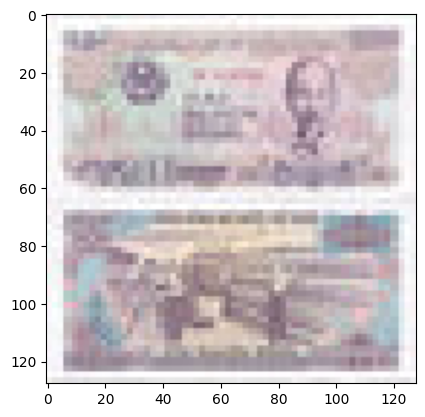

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
{'gia_tien:2k'}


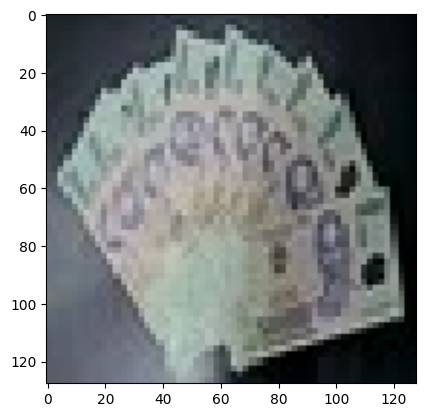

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
{'gia_tien:500k'}


In [8]:
paths= ('/content/drive/MyDrive/drive-download-20250414T061518Z-001/banknotes/100k/30.jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/banknotes/1k/1.jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/banknotes/2k/1.jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/banknotes/500k/Bản sao của 10.jpg')
for image_path in paths:
  img = load_img(image_path, target_size=(128,128))
  plt.imshow(img)
  plt.show()
  img_array= np.array(img)
  img_array= img_array.reshape((1,128,128,3))
  prediction= np.argmax(model.predict(img_array))
  class_labels={v:k for k,v in train_generator.class_indices.items()}
  banknote_name= class_labels[prediction]
  print({f'gia_tien:{banknote_name}'})